<a href="https://colab.research.google.com/github/N3haS/rl-game-for-ocd-dyslexia/blob/main/OCD_and_Adhd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TRIAL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("Mental disorder symptoms.csv")

In [ ]:
df.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety


In [ ]:
df.describe()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.0,637.000000
mean,22.189953,0.638932,0.273155,0.549451,0.368917,0.365777,0.638932,0.273155,0.232339,0.324961,...,0.459969,0.329670,0.364207,0.340659,0.408163,0.244898,0.102041,0.288854,0.0,0.230769
std,8.395680,0.480688,0.445930,0.497940,0.482891,0.482026,0.480688,0.445930,0.422656,0.468728,...,0.498787,0.470463,0.481585,0.474303,0.491880,0.430365,0.302940,0.453586,0.0,0.421656
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,21.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000
max,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
  names = df.columns
  print( names)

Index(['ag+1:629e', 'feeling.nervous', 'panic', 'breathing.rapidly',
       'sweating', 'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'introvert',
       'popping.up.stressful.memory', 'having.nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself', 'hallucinations',
       'repetitive.behaviour', 'seasonally', 'increased.energy', 'Disorder'],
      dtype='object')


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data_filtered = df[df['Disorder'] == 'OCD']

In [ ]:
X_rep_filtered = data_filtered[['repetitive.behaviour']]
y_rep_filtered = data_filtered['Disorder']

In [ ]:
y_rep_encoded_filtered = label_encoder.fit_transform(y_rep_filtered)

In [ ]:
X_rep_train_filtered, X_rep_test_filtered, y_rep_train_filtered, y_rep_test_filtered = train_test_split(X_rep_filtered, y_rep_encoded_filtered, test_size=0.2, random_state=42)


In [ ]:
model_rep_filtered = XGBClassifier()

In [ ]:
model_rep_filtered.fit(X_rep_train_filtered, y_rep_train_filtered)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_rep_pred_filtered = model_rep_filtered.predict(X_rep_test_filtered)

In [ ]:
accuracy_rep_filtered = accuracy_score(y_rep_test_filtered, y_rep_pred_filtered)
print("Accuracy for repetitive behavior model within filtered data:", accuracy_rep_filtered)

Accuracy for repetitive behavior model within filtered data: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to estimate accuracy
cv_scores = cross_val_score(model_rep_filtered, X_rep_filtered, y_rep_encoded_filtered, cv=5)

# Print the range of accuracy
print("Range of accuracy for repetitive behavior model within filtered data:", min(cv_scores), "-", max(cv_scores))


Range of accuracy for repetitive behavior model within filtered data: 1.0 - 1.0


In [ ]:
from joblib import dump

def save_model(model, filename):
    dump(model, filename)

# Save the trained model to a file
save_model(model_rep_filtered_rf, 'repetitive_behavior_model.joblib')


In [ ]:
label_encoder = LabelEncoder()

# Filter the dataset to include only instances with 'OCD' as the target variable
data_filtered = df[df['Disorder'] == 'OCD']

# Define features and target for repetitive behavior within the filtered dataset
X_rep_filtered = data_filtered[['repetitive.behaviour']]
y_rep_filtered = data_filtered['Disorder']  # Target variable

# Encode the target variable for the filtered dataset
y_rep_encoded_filtered = label_encoder.fit_transform(y_rep_filtered)

# Split data into training and testing sets for repetitive behavior within the filtered dataset
X_train, X_test, y_train, y_test = train_test_split(X_rep_filtered, y_rep_encoded_filtered, test_size=0.2, random_state=42)

# Example Keras model creation
keras_model = Sequential()
keras_model.add(Dense(64, input_dim=1, activation='relu'))
keras_model.add(Dense(1, activation='sigmoid'))

# Compile the Keras model
keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Keras model
keras_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Save the trained Keras model to a file
keras_model.save('my_keras_model.h5')

# Now, you can continue with the existing code for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model for repetitive behavior within the filtered dataset
model_rep_filtered_rf = RandomForestClassifier()

# Train the Random Forest model for repetitive behavior within the filtered dataset
model_rep_filtered_rf.fit(X_train, y_train)

# Make predictions for repetitive behavior within the filtered dataset using Random Forest
y_rep_pred_filtered_rf = model_rep_filtered_rf.predict(X_test)

# Evaluate the Random Forest model for repetitive behavior within the filtered dataset
accuracy_rep_filtered_rf = accuracy_score(y_test, y_rep_pred_filtered_rf)
print("Accuracy for repetitive behavior model within filtered data (Random Forest):", accuracy_rep_filtered_rf)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7645 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 23ms/step - loss: 0.7568 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 26ms/step - loss: 0.7492 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 22ms/step - loss: 0.7416 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 43ms/step - loss: 0.7341 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 36ms/step - loss: 0.7267 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 24ms/step - loss: 0.7193 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 0.7120 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 25ms/step - loss: 0.7047 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 22ms/step - loss: 0.6976 - accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Accuracy for repetitive behavior model within filtered data (Random Forest): 1.0


**ADHD**

In [ ]:
label_encoder = LabelEncoder()

data_filtered = df[df['Disorder'] == 'ADHD']

X_conc_filtered = data_filtered[['trouble.in.concentration']]
y_conc_filtered = data_filtered['Disorder']

y_conc_encoded_filtered = label_encoder.fit_transform(y_conc_filtered)

X_conc_train_filtered, X_conc_test_filtered, y_conc_train_filtered, y_conc_test_filtered = train_test_split(X_conc_filtered, y_conc_encoded_filtered, test_size=0.2, random_state=42)


In [ ]:
model_conc_filtered = XGBClassifier()

model_conc_filtered.fit(X_conc_train_filtered, y_conc_train_filtered)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_conc_pred_filtered = model_conc_filtered.predict(X_conc_test_filtered)

In [ ]:
accuracy_conc_filtered = accuracy_score(y_conc_test_filtered, y_conc_pred_filtered)
print("Accuracy for repetitive behavior model within filtered data:", accuracy_conc_filtered)

from sklearn.model_selection import cross_val_score

# Perform cross-validation to estimate accuracy
cv_scores = cross_val_score(model_conc_filtered, X_conc_filtered, y_conc_encoded_filtered, cv=5)

# Print the range of accuracy
print("Range of accuracy for repetitive behavior model within filtered data:", min(cv_scores), "-", max(cv_scores))


Accuracy for repetitive behavior model within filtered data: 1.0
Range of accuracy for repetitive behavior model within filtered data: 1.0 - 1.0


In [ ]:
from joblib import dump

def save_model(model, filename):
    dump(model, filename)

# Save the trained model to a file
save_model(model_conc_filtered, 'ADHD_conc.joblib')


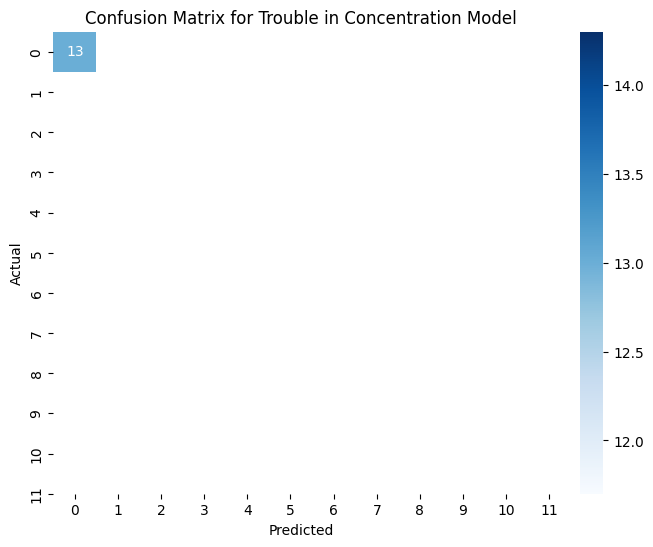

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_conc_test_filtered, y_conc_pred_filtered)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_conc.classes_, yticklabels=model_conc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Trouble in Concentration Model')
plt.show()


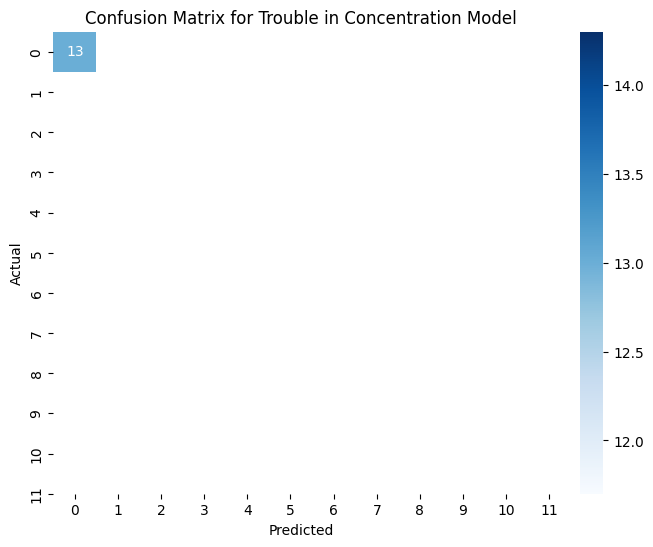

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_rep_test_filtered, y_rep_pred_filtered)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_conc.classes_, yticklabels=model_conc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Trouble in Concentration Model')
plt.show()


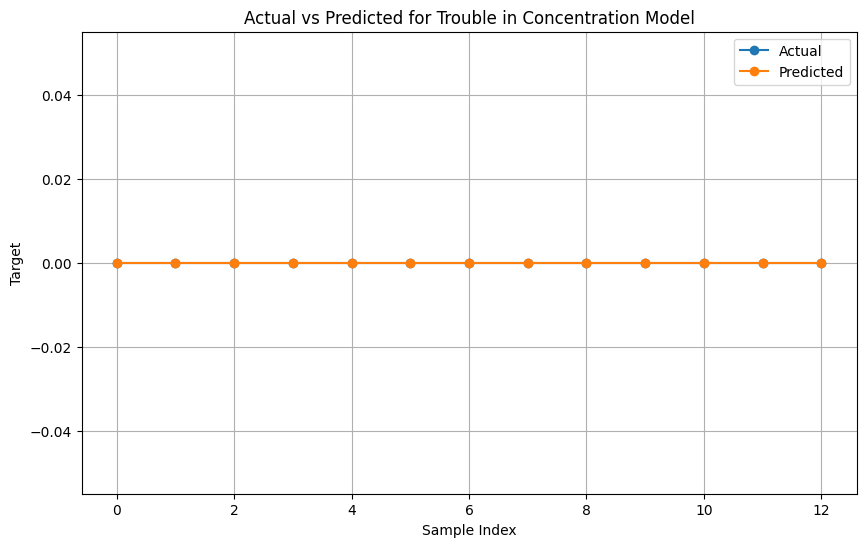

In [ ]:
import numpy as np

# Generate a linear range of values for plotting
x_values = np.arange(len(y_conc_test_filtered))

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_conc_test_filtered[:len(x_values)], marker='o', linestyle='-', label='Actual')
plt.plot(x_values, y_conc_pred_filtered[:len(x_values)], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target')
plt.title('Actual vs Predicted for Trouble in Concentration Model')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.utils import shuffle
# Shuffle the dataset
df_shuffled = shuffle(df, random_state=42)

# Define features and target for repetitive behavior within the shuffled dataset
X_rep = df_shuffled[['repetitive.behaviour']]
y_rep = df_shuffled['Disorder']  # Target variable

# Encode the target variable
label_encoder = LabelEncoder()
y_rep_encoded = label_encoder.fit_transform(y_rep)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rep, y_rep_encoded, test_size=0.2, random_state=42)

# Define the XGBoost model with early stopping
model_rep = XGBClassifier(n_estimators=1000, early_stopping_rounds=10, eval_metric='merror')

# Train the model
model_rep.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Make predictions
y_pred = model_rep.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for repetitive behavior model:", accuracy)


Accuracy for repetitive behavior model: 0.1484375


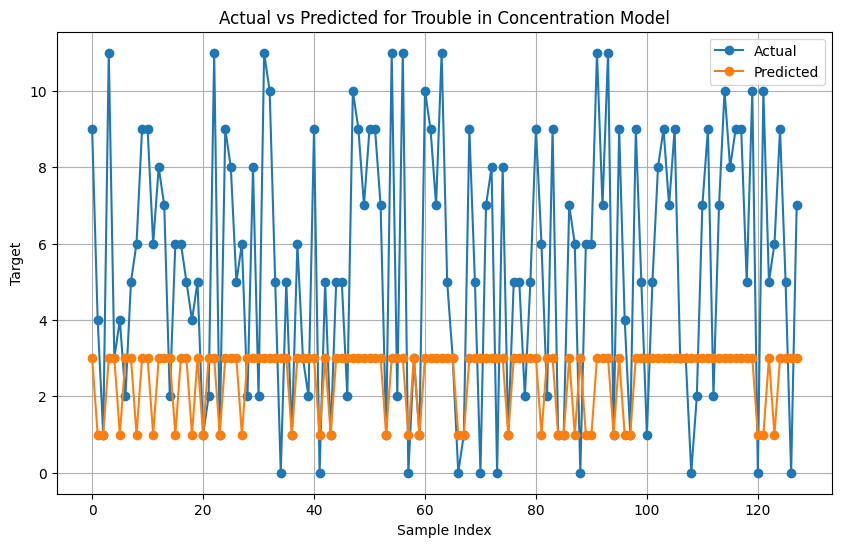

In [ ]:
import numpy as np

# Generate a linear range of values for plotting
x_values = np.arange(len(y_test))

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_test[:len(x_values)], marker='o', linestyle='-', label='Actual')
plt.plot(x_values, y_pred[:len(x_values)], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target')
plt.title('Actual vs Predicted for Trouble in Concentration Model')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
}

# Initialize XGBoost classifier
xgb = XGBClassifier(n_estimators=1000, eval_metric='merror')

# Perform grid search
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.7}
Best Accuracy: 0.25342847198050816


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


##FINAL

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

df = pd.read_csv("Mental disorder symptoms.csv")

X = df.drop(columns=['Disorder'])
y = df['Disorder']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

preprocessor = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier())
])

best_params = {
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.7,
}

best_model = XGBClassifier(**best_params)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best parameters:", accuracy)


Accuracy with best parameters: 0.96875
